<a href="https://colab.research.google.com/github/ashfaknawshad/ml-roadmap/blob/main/03_ml_basics/penguin_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1 – Set up imports

In [1]:
# Lesson 4 - Classification Basics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


###Step 2 – Load and prepare data

In [2]:
# Load dataset
data = sns.load_dataset("penguins").dropna()

# Encode species labels into numbers
encoder = LabelEncoder()
data["species_encoded"] = encoder.fit_transform(data["species"])

# Define features and target
X = data[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = data["species_encoded"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 3 – Train the model

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


###Step 4 – Evaluate performance

In [6]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]


###Step 6 – Visualize the results

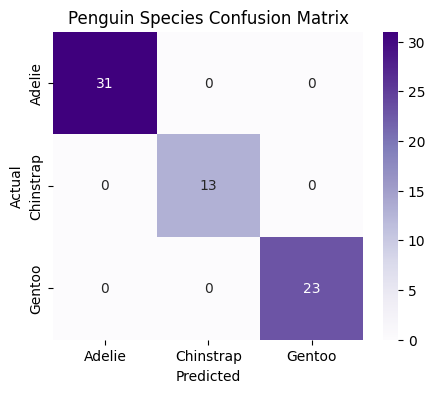

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",
            cmap="Purples", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Penguin Species Confusion Matrix")
plt.show()
